# 1) In This data Set The data set contains various information that effect the predictions like Age, Sex, BP, Cholesterol levels, Na to Potassium Ratio and finally the drug type. so we can using this data set to find out the which type of drug give to particular age peoples. 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns 


dt = pd.read_csv('drug200.csv')
dt.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [15]:
dt.shape

(200, 6)

In [16]:
dt.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [17]:
dt.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<AxesSubplot:>

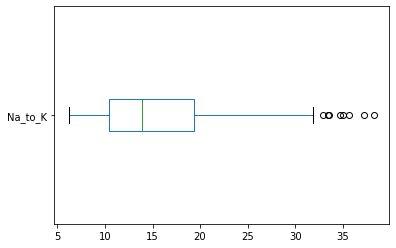

In [18]:
dt['Na_to_K'].plot.box(vert=False)

<AxesSubplot:>

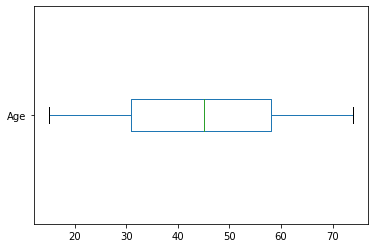

In [19]:
dt['Age'].plot.box(vert=False)

# 2) Mention your approach to solve the problem.
      Load Dataset
      Data Analysis
      Create Model
      Train and Test the Model
      Check Models score
      

In [20]:
label_encoder = LabelEncoder()
# Label Encoding
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
# Encoding Sex
le1.fit(dt.Sex)
dt.Sex=le1.transform(dt.Sex)

# Encoding BP
le2.fit(dt.BP)
dt.BP=le2.transform(dt.BP)

# Encoding Cholesterol
le3.fit(dt.Cholesterol)
dt.Cholesterol=le3.transform(dt.Cholesterol)

# Encoding Drug
le4.fit(dt.Drug)
dt.Drug=le4.transform(dt.Drug)


In [21]:
dt

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [38]:
# create input Dataset 
X= dt[['Age','Sex','BP','Cholesterol','Na_to_K']]
# create output dataset
y= dt['Drug']

# Give training and testing dataset to model 
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

#instantiate the DecisionTreeClassifier 
model= DecisionTreeClassifier()
# Train the model with 80% of training data 
model= model.fit(X_train,y_train)

# Test model predtiction  
predictions =model.predict(X_test)

#check the accuracy score  
score = accuracy_score(y_test,predictions)
score

0.975

<AxesSubplot:xlabel='Drug', ylabel='count'>

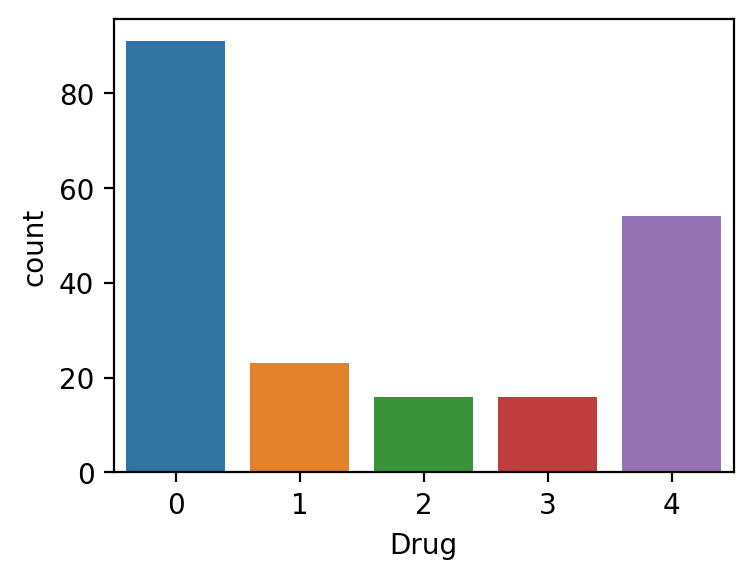

In [28]:
plt.figure(figsize = (4,3),dpi = 200)
sns.countplot(data = dt , x = 'Drug')

<AxesSubplot:xlabel='Age', ylabel='Na_to_K'>

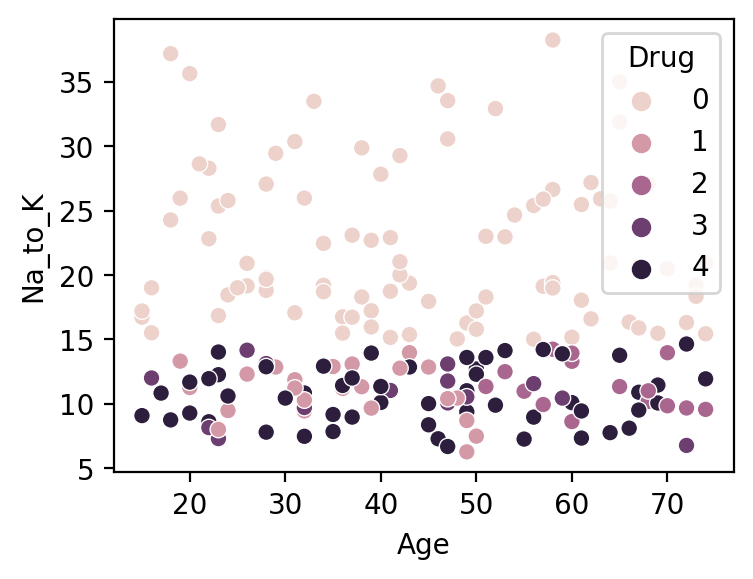

In [36]:
plt.figure(figsize = (4,3),dpi = 200)
sns.scatterplot(data = dt , x = 'Age' , y = 'Na_to_K',hue = 'Drug')

<AxesSubplot:>

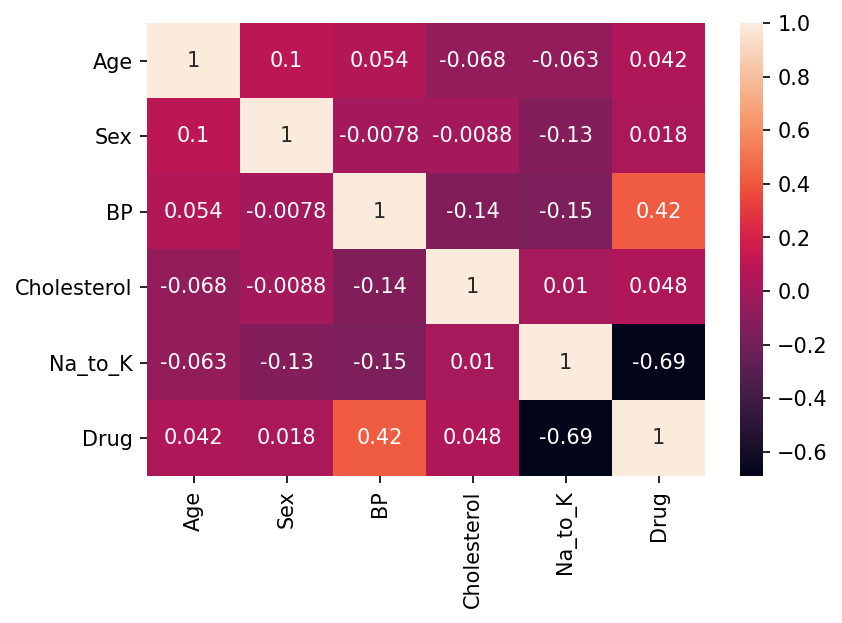

In [33]:
plt.figure(figsize = (6,4),dpi = 150)
sns.heatmap(dt.corr(),annot = True)

# 3) find out solution of the problem and report the insights.

       By using DecisionTreeClassifier algorithm we can find out the model score and by using graps it shows the data visualize.